<a href="https://colab.research.google.com/github/lindseyhuppin/Neur265Work/blob/main/finalProject/FinalPosterPresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is written for the Methods and Results portion of the Final Poster Presentation in Intro to Neural Data Analysis.

Lindsey Huppin

4/21/24

####Notes on data:

column information:

0 = index value

1 = patient ID

2 = cognitive status

3 = fresh brain weight

4 = number of pTDP43 positive cells per area_Grey matter

5 = total Iba1 positive area_Grey matter

6 = number of 6e10 positive objects per area_Grey matter

7 = total GFAP positive area_Grey matter

In [23]:
#adding libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
#Importing the data as .csv files, organized from the original data source
data = np.loadtxt('https://raw.githubusercontent.com/lindseyhuppin/Neur265Work/main/finalProject/AlzheimerData.csv',delimiter = ',',dtype = 'str')
data[0][0] = '0' #this adjusts for an error that occurs when importing the data

In [3]:
#Sorting the data
index = data[:,0].astype(int)
patientID = data[:,1]
cognitiveStatus = data[:,2]
brainWeight_temp = data[:,3]
pTDP43 = data[:,4].astype(float)
Iba1 = data[:,5].astype(float)
_6e10 = data[:,6].astype(float)
GFAP = data[:,7].astype(float)

brainWeight_str = np.delete(brainWeight_temp,30) #removes the unavailable data
brainWeight = brainWeight_str.astype(int)

In [4]:
pTDP43_noD = []
_6e10_noD = []
pTDP43_yD = []
_6e10_yD = []

Iba1_less = []
GFAP_less = []
Iba1_more = []
GFAP_more = []

for i in range(index.size):
  if cognitiveStatus[i] == 'No dementia':
    pTDP43_noD.append(pTDP43[i])
    _6e10_noD.append(_6e10[i])
  elif cognitiveStatus[i] == 'Dementia':
    pTDP43_yD.append(pTDP43[i])
    _6e10_yD.append(_6e10[i])
  else:
    print('Throwing error: sorting incorrect')

  if i == index.size-1:
    continue
  else:
    if brainWeight[i] <= 1162:
      Iba1_less.append(Iba1[i])
      GFAP_less.append(GFAP[i])
    elif brainWeight[i] > 1162:
      Iba1_more.append(Iba1[i])
      GFAP_more.append(GFAP[i])
    else:
      print('Throwing error: sorting incorrect')

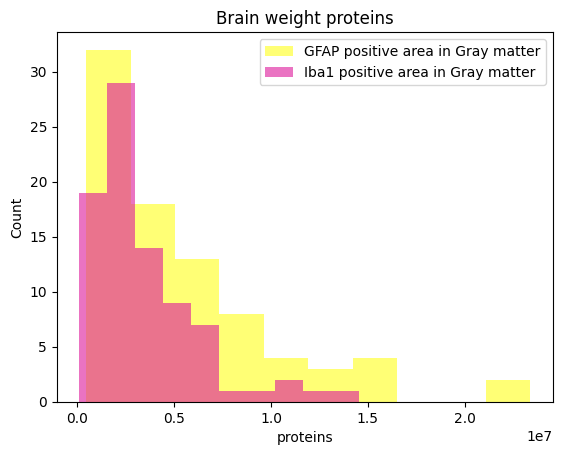

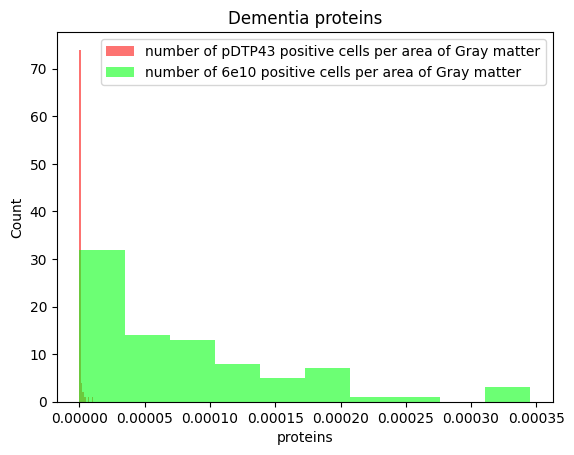

In [67]:
#brain weight histogram
plt.hist(GFAP, color = '#ffff1f9d')
plt.hist(Iba1,color = '#dd1c9d9d')
plt.xlabel('proteins')
plt.ylabel('Count')
plt.title('Brain weight proteins')
plt.legend(['GFAP positive area in Gray matter','Iba1 positive area in Gray matter'])
plt.show()

#dementia/no dementia histogram
plt.hist(pTDP43, color = '#fd1f1c9f')
plt.hist(_6e10,color = '#11ff1d9d')
plt.xlabel('proteins')
plt.ylabel('Count')
plt.title('Dementia proteins')
plt.legend(['number of pDTP43 positive cells per area of Gray matter','number of 6e10 positive cells per area of Gray matter'])
plt.show()

In [28]:
#skewness test
print(stats.skewtest(GFAP))
print(stats.skewtest(Iba1))
print(stats.skewtest(pTDP43))
print(stats.skewtest(_6e10))

SkewtestResult(statistic=4.735953946912105, pvalue=2.180270975822916e-06)
SkewtestResult(statistic=5.279523564845296, pvalue=1.295202219098115e-07)
SkewtestResult(statistic=8.60943797663429, pvalue=7.341963407599332e-18)
SkewtestResult(statistic=4.336929712044732, pvalue=1.444868032790025e-05)


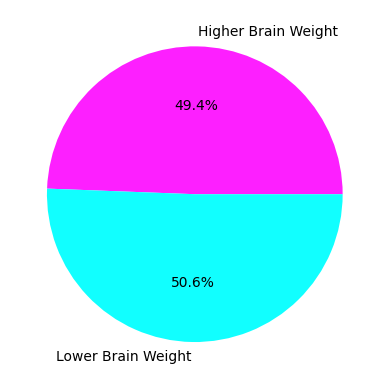

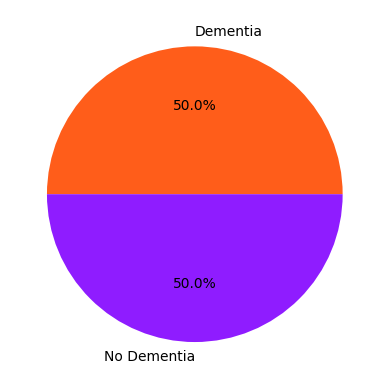

In [64]:
#bar/pie graphs
plt.pie([len(GFAP_more),len(GFAP_less)], colors = ['#fd1fff','#11ffff'], labels = ['Higher Brain Weight', 'Lower Brain Weight'], autopct='%1.1f%%')
plt.show()
plt.pie([len(pTDP43_yD),len(pTDP43_noD)], colors = ['#ff5d1a','#8f1cff'], labels = ['Dementia', 'No Dementia'], autopct='%1.1f%%')
plt.show()

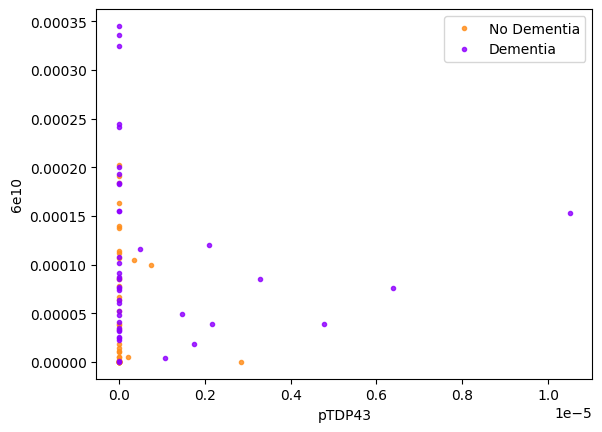

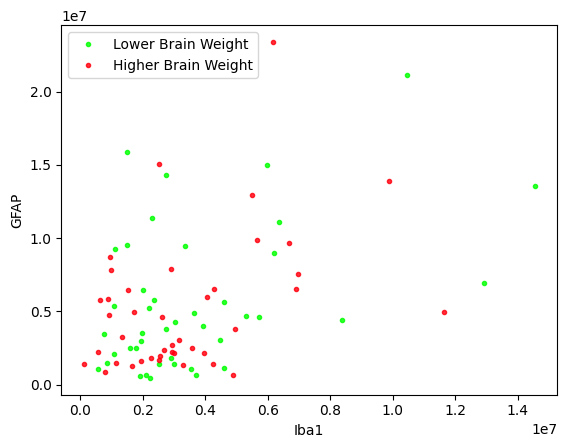

In [65]:
#scatter plots
plt.plot(pTDP43_noD,_6e10_noD,'.', color = '#ff8d1acf')
plt.plot(pTDP43_yD,_6e10_yD,'.', color = '#8f00ffcf')
plt.xlabel('pTDP43')
plt.ylabel('6e10')
plt.legend(['No Dementia','Dementia'])
plt.show()
plt.plot(Iba1_less,GFAP_less,'.', color = '#00ff00cf')
plt.plot(Iba1_more,GFAP_more,'.', color = '#ff000dcf')
plt.xlabel('Iba1')
plt.ylabel('GFAP')
plt.legend(['Lower Brain Weight','Higher Brain Weight'])
plt.show()

In [73]:
#correlations
def autocorr(x, y):
    corr = np.correlate(x, y, 'full')  # Compute the autocorrelation
    corr = corr[corr.size//2:] / corr.max()               # Convert to correlation coefficients
    return corr.mean()                                    # Return only requested lags

print(autocorr(pTDP43,_6e10))
print(autocorr(Iba1,GFAP))

0.34965658475926326
0.3746661014843724


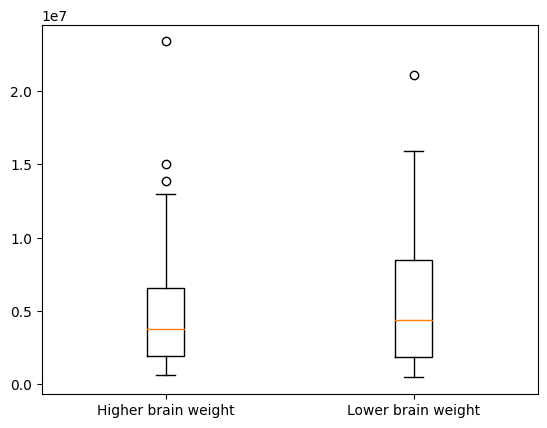

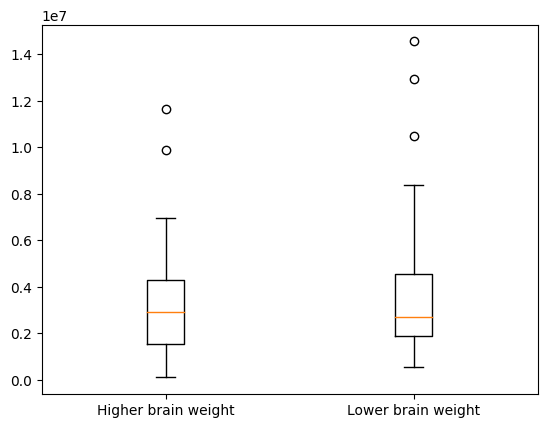

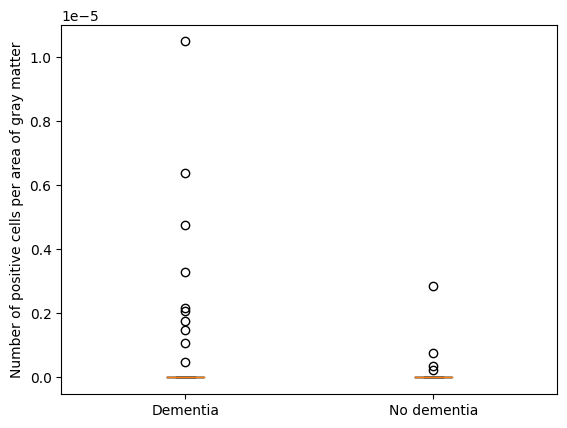

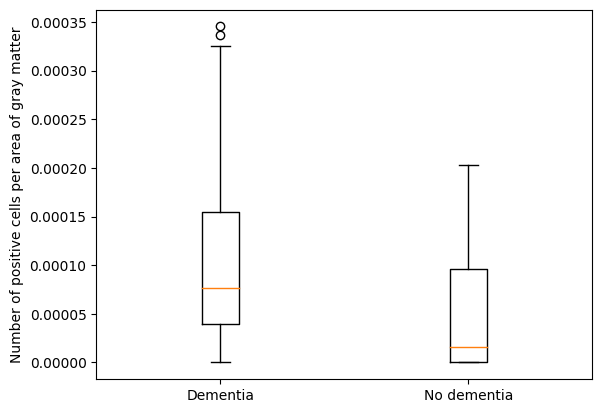

In [74]:
#boxplots
plt.boxplot([GFAP_more,GFAP_less], labels = ['Higher brain weight','Lower brain weight'])
plt.show()

plt.boxplot([Iba1_more,Iba1_less], labels = ['Higher brain weight','Lower brain weight'])
plt.ylabel('Total Iba1 positive area in gray matter')
plt.show()

plt.boxplot([pTDP43_yD,pTDP43_noD], labels = ['Dementia','No dementia'])
plt.ylabel('Number of pTDP43 positive cells per area of gray matter')
plt.show()

plt.boxplot([_6e10_yD,_6e10_noD], labels = ['Dementia','No dementia'])
plt.ylabel('Number of 6e10 positive cells per area of gray matter')
plt.show()

In [39]:
#Wilcoxon rank sums tests
print(stats.ranksums(GFAP_more,GFAP_less))
print(stats.ranksums(Iba1_more,Iba1_less))
print(stats.ranksums(pTDP43_yD,pTDP43_noD))
print(stats.ranksums(_6e10_yD,_6e10_noD))

RanksumsResult(statistic=-0.10019062633852459, pvalue=0.9201929876679245)
RanksumsResult(statistic=-0.23681420770923994, pvalue=0.8128009288799039)
RanksumsResult(statistic=1.2435025208690826, pvalue=0.21368271259429528)
RanksumsResult(statistic=3.2429472216909527, pvalue=0.0011830012331432104)
